# **Problem Statement**

Predict whether a shipment will be delayed, assign a delay risk score before the delay occurs, and identify the most likely cause of the delay.

# **Section 1 Understanding the dataset**

In [ ]:
import pandas as pd

df = pd.read_csv("smart_logistics_dataset.csv")
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                1000 non-null   object 
 1   Asset_ID                 1000 non-null   object 
 2   Latitude                 1000 non-null   float64
 3   Longitude                1000 non-null   float64
 4   Inventory_Level          1000 non-null   int64  
 5   Shipment_Status          1000 non-null   object 
 6   Temperature              1000 non-null   float64
 7   Humidity                 1000 non-null   float64
 8   Traffic_Status           1000 non-null   object 
 9   Waiting_Time             1000 non-null   int64  
 10  User_Transaction_Amount  1000 non-null   int64  
 11  User_Purchase_Frequency  1000 non-null   int64  
 12  Logistics_Delay_Reason   737 non-null    object 
 13  Asset_Utilization        1000 non-null   float64
 14  Demand_Forecast          

In [ ]:
df.head()

,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
0,2024-03-20 00:11:14,Truck_7,-65.7383,11.2497,390,Delayed,27.0,67.8,Detour,38,320,4,NaN,60.1,285,1
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
2,2024-07-29 18:42:48,Truck_10,54.9232,79.5455,190,In Transit,25.2,62.2,Detour,34,355,3,NaN,99.2,260,0
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
4,2024-09-27 15:52:58,Truck_7,-65.8477,47.9468,480,Delayed,20.5,57.2,Clear,56,197,6,NaN,71.6,270,1


In [ ]:
df.describe()

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Asset_Utilization,Demand_Forecast,Logistics_Delay
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-1.360093,0.837049,297.915000,23.893900,65.042200,35.062000,299.055000,5.513000,79.599100,199.284000,0.566000
std,51.997183,104.843618,113.554773,3.322178,8.753765,14.477768,117.787792,2.935379,11.631153,59.920847,0.495873
min,-89.791500,-179.820200,100.000000,18.000000,50.000000,10.000000,100.000000,1.000000,60.000000,100.000000,0.000000
25%,-46.167975,-88.448075,201.000000,21.200000,57.200000,23.000000,191.750000,3.000000,69.475000,144.000000,0.000000
50%,-4.503150,0.678300,299.000000,23.800000,65.200000,35.000000,301.500000,6.000000,79.250000,202.000000,1.000000
75%,44.502800,88.156450,399.000000,26.600000,72.400000,49.000000,405.000000,8.000000,89.425000,251.250000,1.000000
max,89.870100,179.923700,500.000000,30.000000,80.000000,60.000000,500.000000,10.000000,100.000000,300.000000,1.000000


# **Section 2: Data Quality Checks**

1)Check Missing Value


<Axes: >

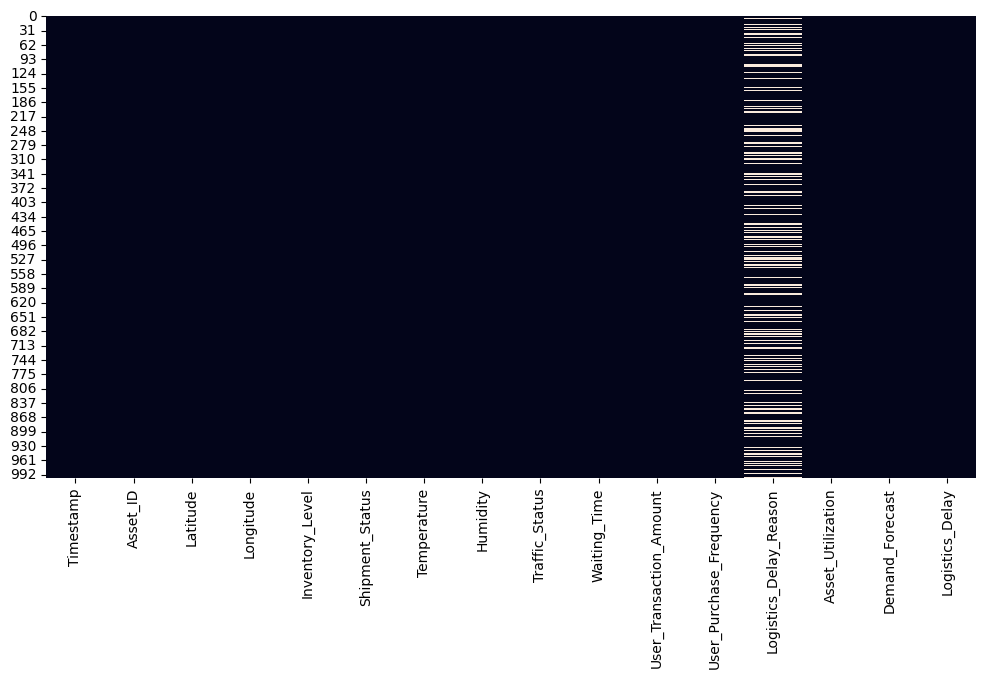

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False)


Check duplicate rows

In [ ]:
df.duplicated().any()


np.False_

Timestamp is converted to timestamp dataset
and all the categorical column are converted to categorical datatype


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
categorical_cols = ['Asset_ID','Shipment_Status', 'Traffic_Status', 'Logistics_Delay_Reason']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                1000 non-null   datetime64[ns]
 1   Asset_ID                 1000 non-null   category      
 2   Latitude                 1000 non-null   float64       
 3   Longitude                1000 non-null   float64       
 4   Inventory_Level          1000 non-null   int64         
 5   Shipment_Status          1000 non-null   category      
 6   Temperature              1000 non-null   float64       
 7   Humidity                 1000 non-null   float64       
 8   Traffic_Status           1000 non-null   category      
 9   Waiting_Time             1000 non-null   int64         
 10  User_Transaction_Amount  1000 non-null   int64         
 11  User_Purchase_Frequency  1000 non-null   int64         
 12  Logistics_Delay_Reason   737 non-nu

Here I have changed Asset_ID to categorical values because
unique values in Asset_ID is only 10 and the ratio unique and total number of dataset is 0.01

In [ ]:
count = df['Asset_ID'].nunique()
print(count)
print(len(df))
print(count/len(df))

10
1000
0.01


Box plot to detect to outliers

these 3  variables are most likely to contain real-world anomalies because they come from:

IoT sensors (Temperature, Humidity)
Operational measurements (Waiting_Time)

<Axes: >

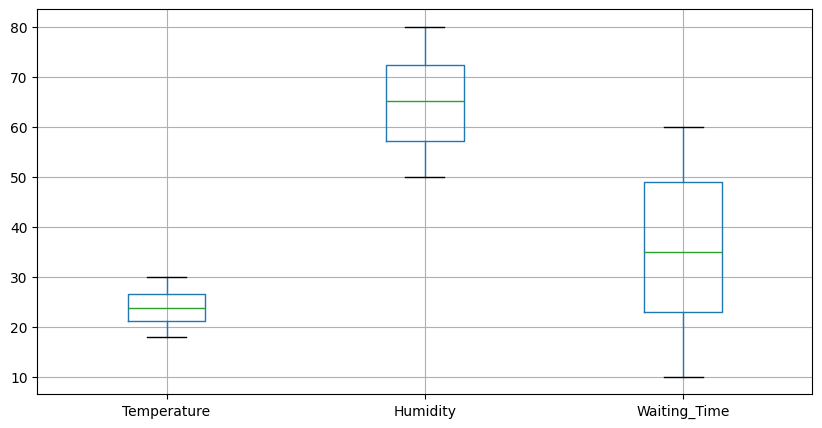

In [ ]:
df[['Temperature', 'Humidity', 'Waiting_Time']].boxplot(figsize=(10,5))


Even I have did outlier detection for other features

<Axes: >

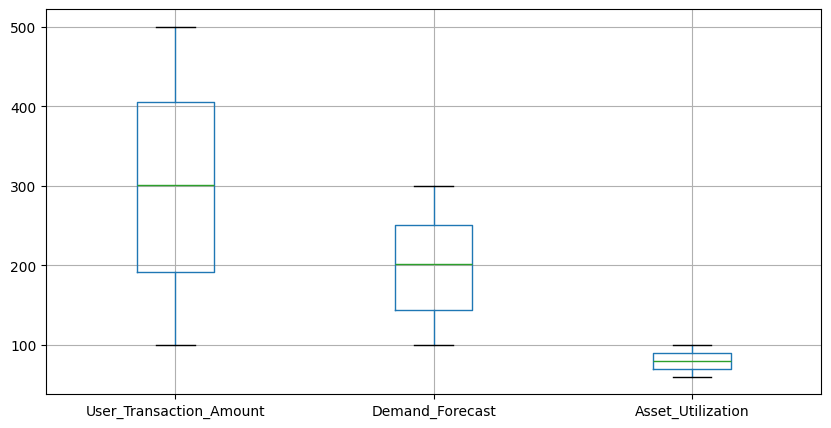

In [ ]:
df[['User_Transaction_Amount','Demand_Forecast','Asset_Utilization']].boxplot(figsize=(10,5))

Scatter plot for Latitude and longitude for outlier detection

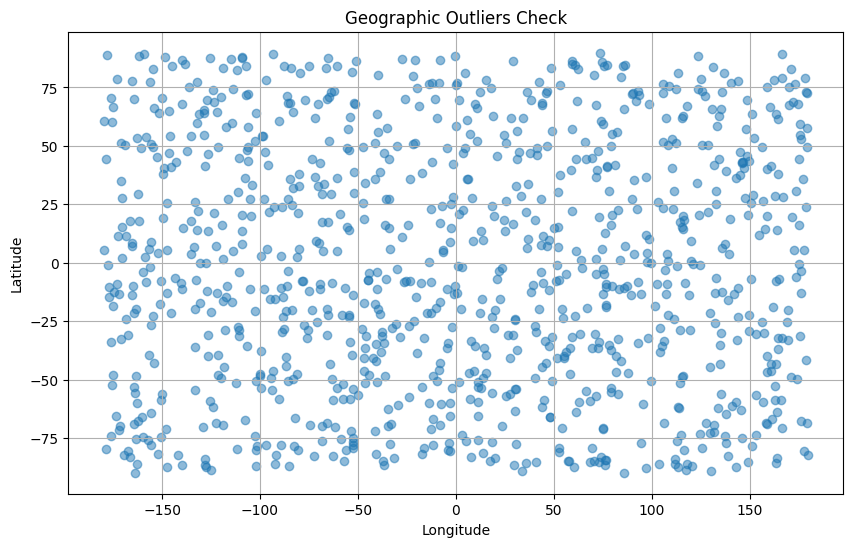

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5)
plt.title("Geographic Outliers Check")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

## **Section3: Univariate Analysis**

<Axes: ylabel='Frequency'>

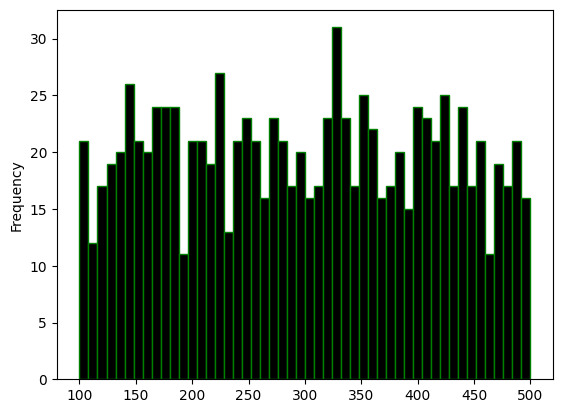

In [ ]:
df['Inventory_Level'].plot(kind='hist', bins=50, edgecolor='green', color="black")


<Axes: ylabel='Frequency'>

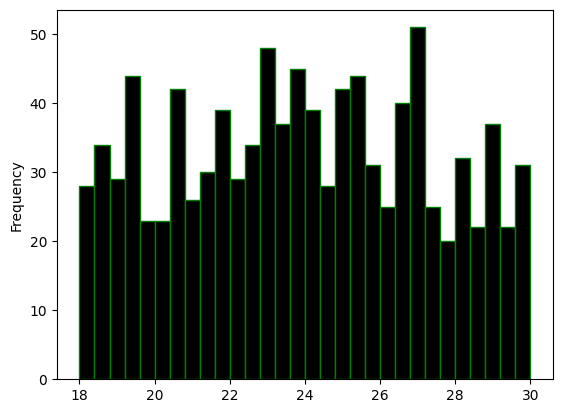

In [ ]:
df['Temperature'].plot(kind='hist', bins=30, edgecolor='green', color="black")

<Axes: ylabel='Frequency'>

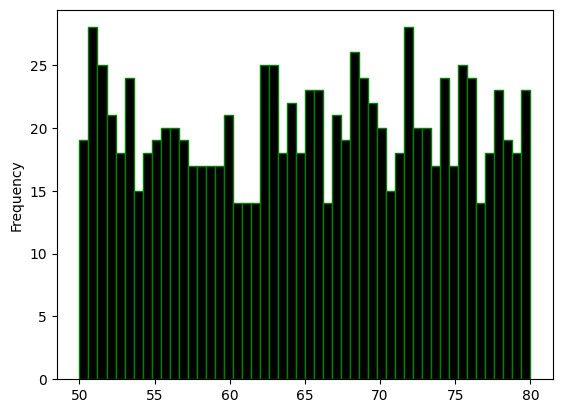

In [ ]:
df['Humidity'].plot(kind='hist', bins=50, edgecolor='green', color="black")

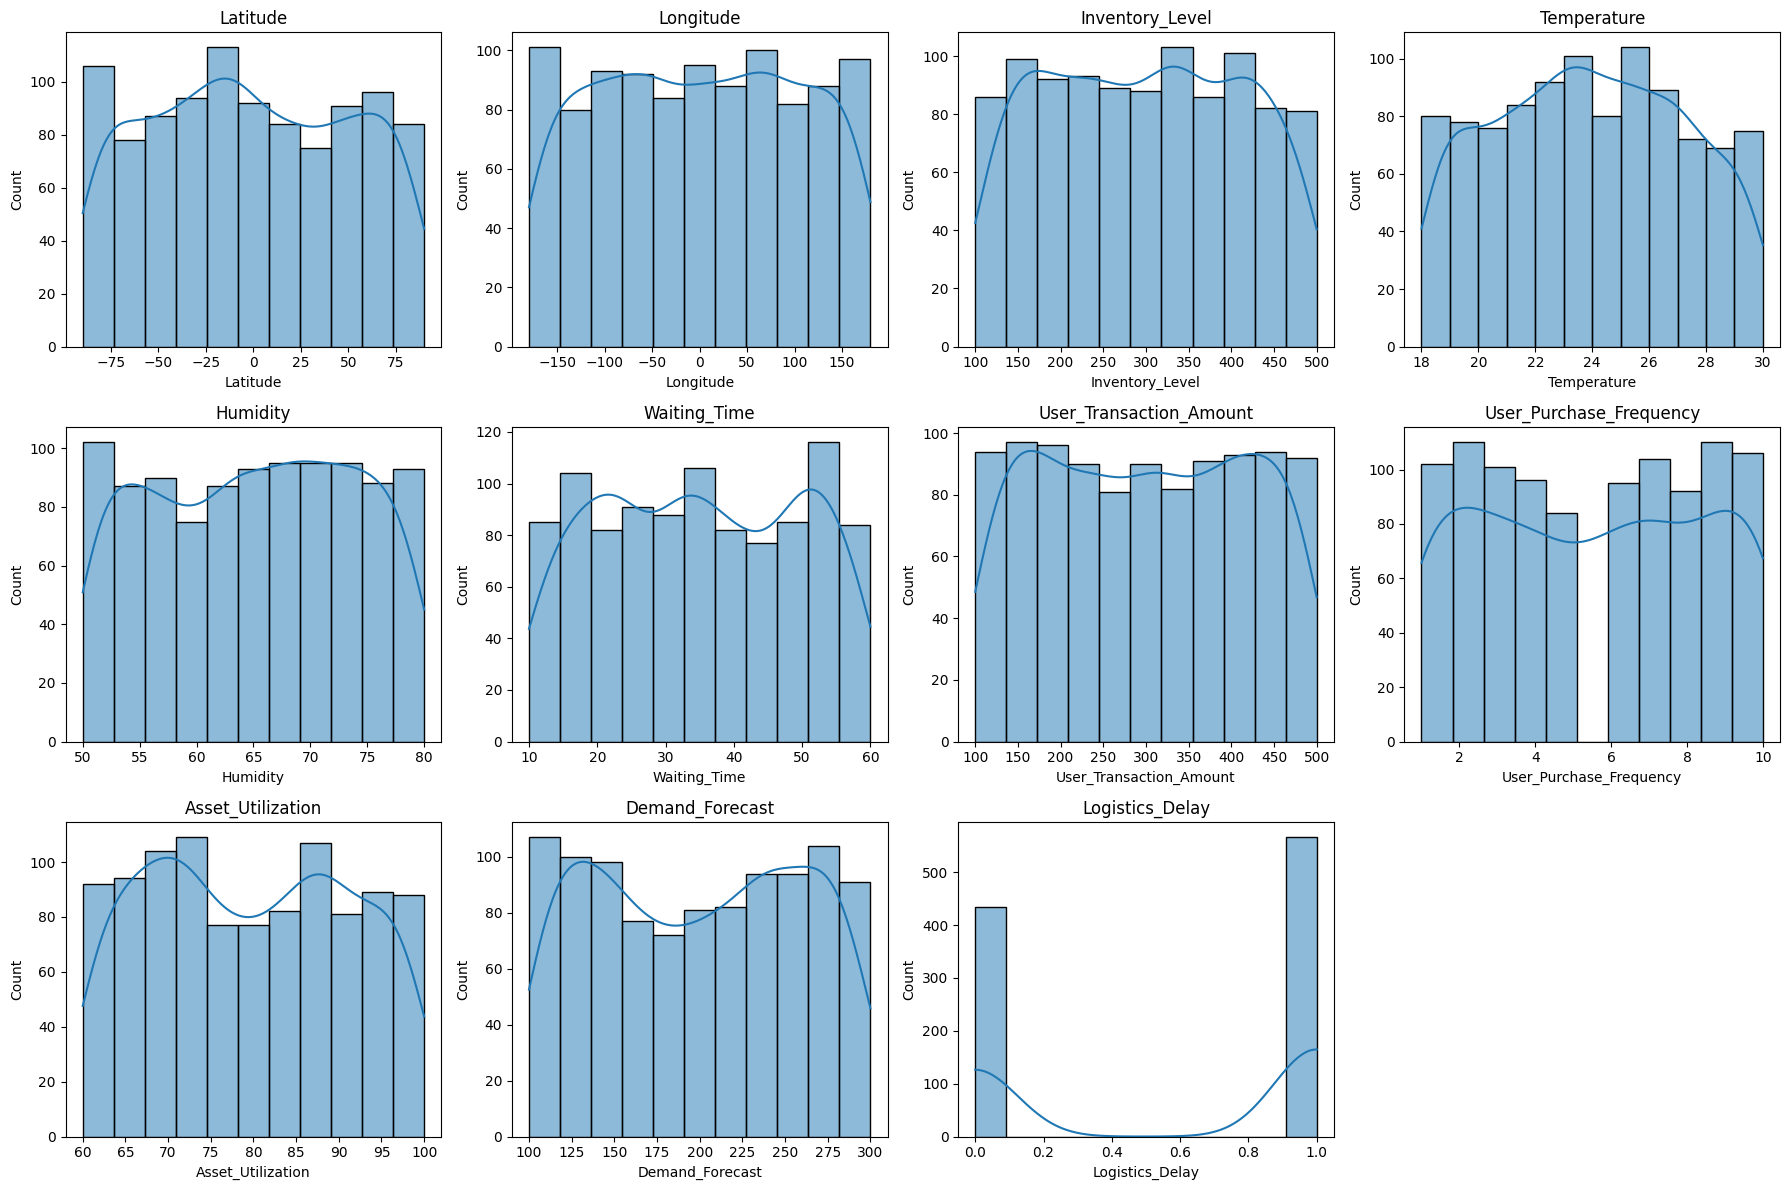

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set figure size based on number of plots
plt.figure(figsize=(18, 12)) # Adjusted figsize for 3x4 layout

# Loop through numerical columns
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)  # Adjusted layout to 3 rows, 4 columns
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_cols


Index(['Asset_ID', 'Shipment_Status', 'Traffic_Status',
       'Logistics_Delay_Reason'],
      dtype='object')

/tmp/ipython-input-1364979374.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-1364979374.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-1364979374.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-1364979374.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=

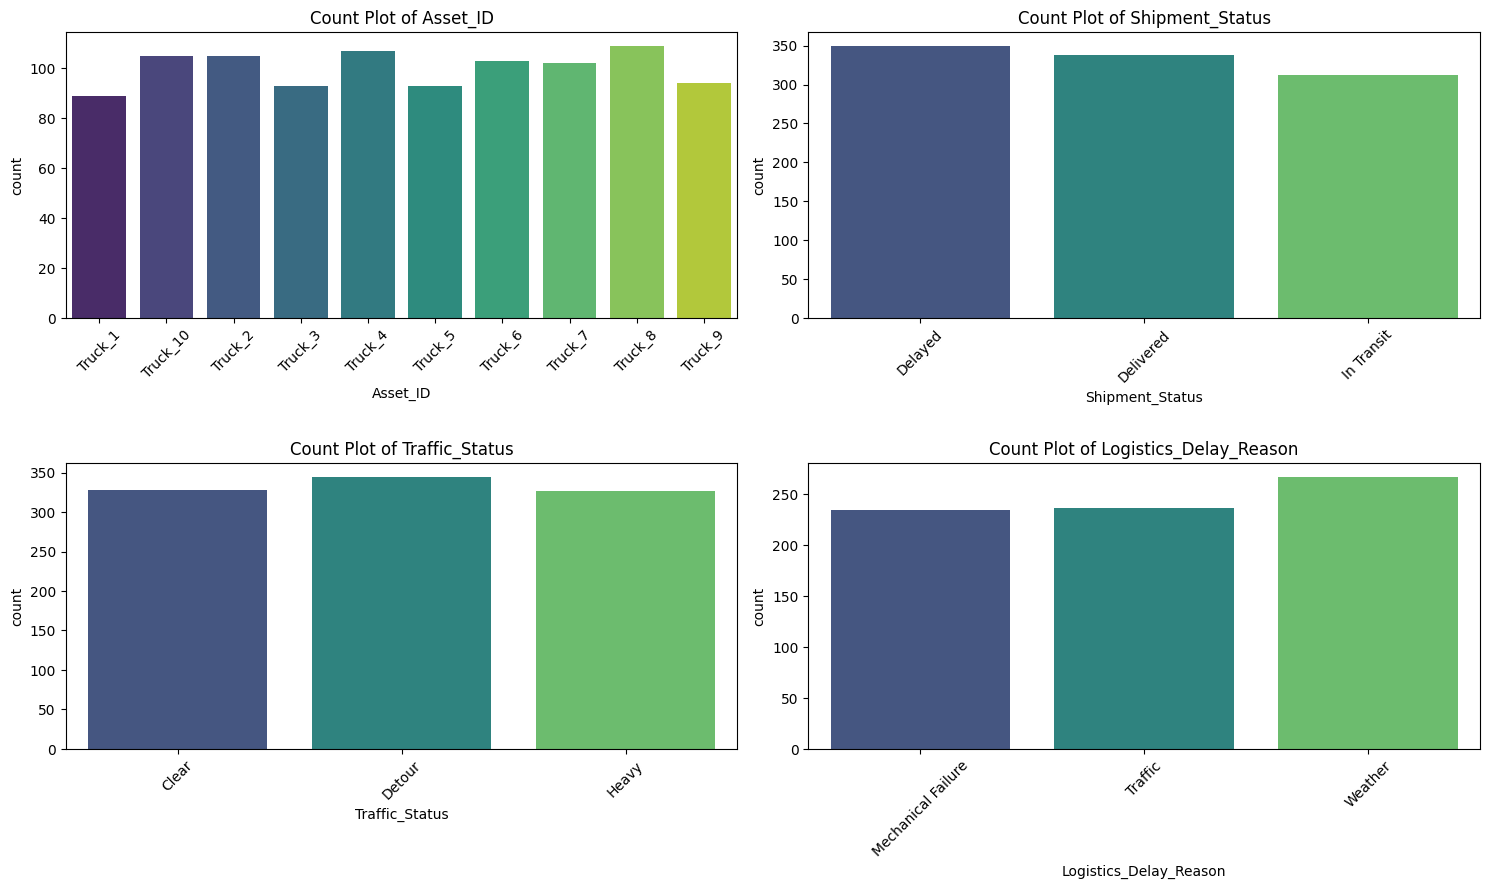

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Analysis of Langitude and Latitude on maps

In [ ]:
import folium

m = folium.Map(
    location=[df['Latitude'].mean(), df['Longitude'].mean()],
    zoom_start=6
)

for _, row in df.iterrows():
    color = 'red' if row['Logistics_Delay'] == 1 else 'green'

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=4,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(m)

m


Bivarite Analysis

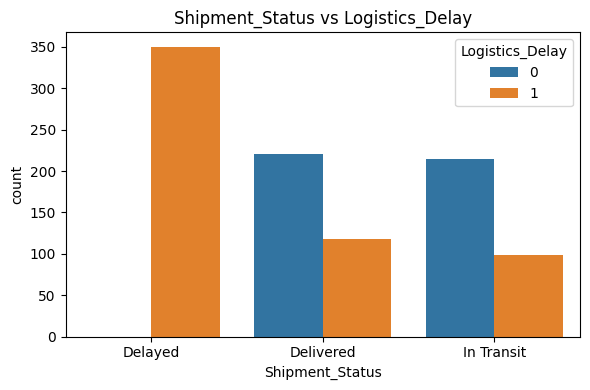

/tmp/ipython-input-2359612125.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_rate = df.groupby(feature)['Logistics_Delay'].mean().reset_index()


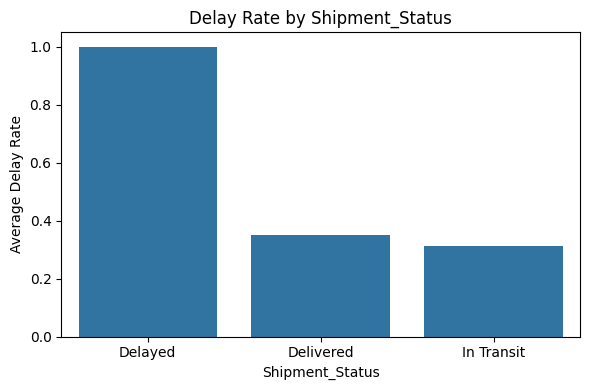

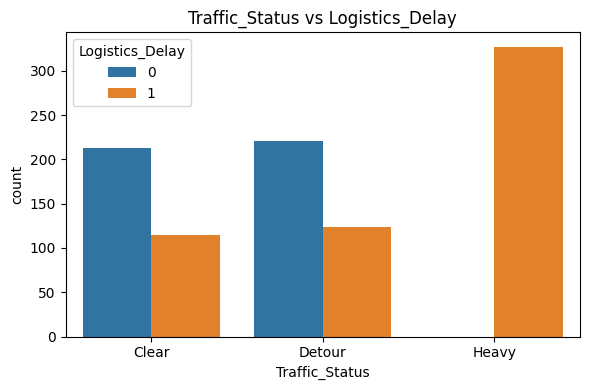

/tmp/ipython-input-2359612125.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_rate = df.groupby(feature)['Logistics_Delay'].mean().reset_index()


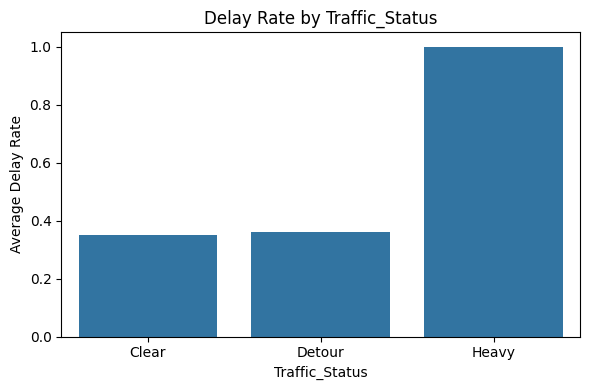

In [ ]:
categorical_features = ['Shipment_Status', 'Traffic_Status']

# Countplot by delay
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='Logistics_Delay', data=df)
    plt.title(f'{feature} vs Logistics_Delay')
    plt.tight_layout()
    plt.show()

    # Plot target rate by category
    delay_rate = df.groupby(feature)['Logistics_Delay'].mean().reset_index()
    plt.figure(figsize=(6, 4))
    sns.barplot(x=feature, y='Logistics_Delay', data=delay_rate)
    plt.title(f'Delay Rate by {feature}')
    plt.ylabel('Average Delay Rate')
    plt.tight_layout()
    plt.show()


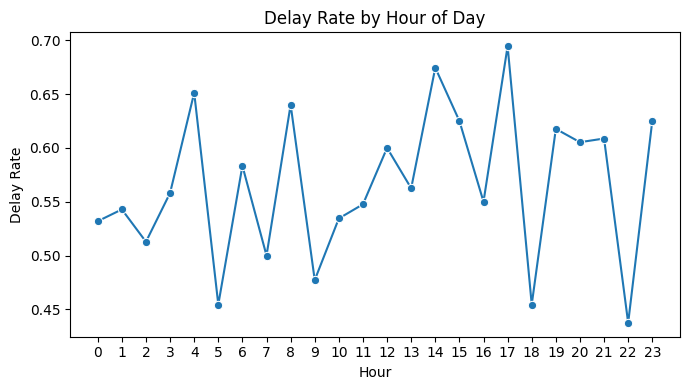

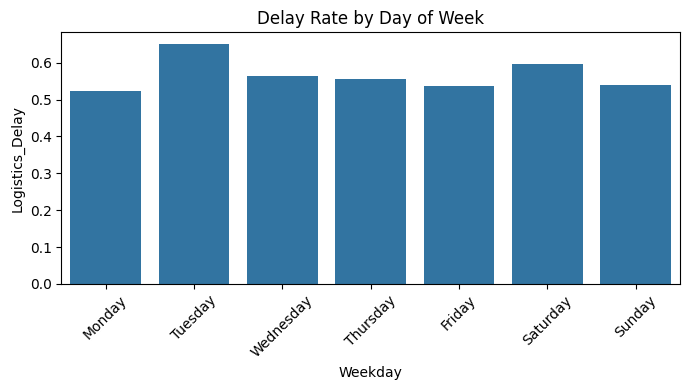

In [ ]:
# Create time features
df['Hour'] = df['Timestamp'].dt.hour
df['Weekday'] = df['Timestamp'].dt.day_name()
df['Month'] = df['Timestamp'].dt.month

# Plot delay rate by hour
delay_by_hour = df.groupby('Hour')['Logistics_Delay'].mean().reset_index()
plt.figure(figsize=(7, 4))
sns.lineplot(x='Hour', y='Logistics_Delay', data=delay_by_hour, marker='o')
plt.title('Delay Rate by Hour of Day')
plt.ylabel('Delay Rate')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Delay rate by weekday
delay_by_day = df.groupby('Weekday')['Logistics_Delay'].mean().reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
delay_by_day['Weekday'] = pd.Categorical(delay_by_day['Weekday'], categories=day_order, ordered=True)
delay_by_day.sort_values('Weekday', inplace=True)

plt.figure(figsize=(7, 4))
sns.barplot(x='Weekday', y='Logistics_Delay', data=delay_by_day)
plt.title('Delay Rate by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2744534849.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_rate = df_copy.groupby('bin')['Logistics_Delay'].mean().reset_index()


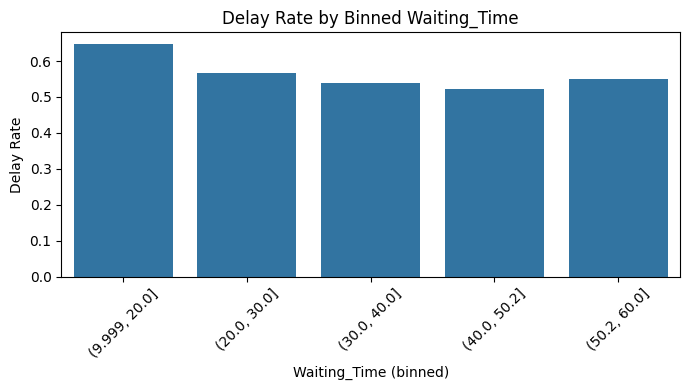

/tmp/ipython-input-2744534849.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_rate = df_copy.groupby('bin')['Logistics_Delay'].mean().reset_index()


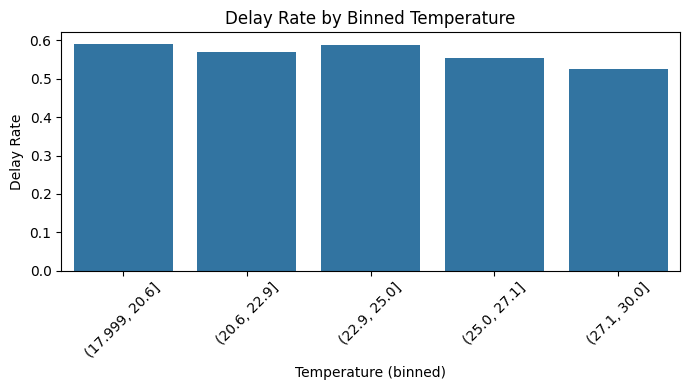

/tmp/ipython-input-2744534849.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_rate = df_copy.groupby('bin')['Logistics_Delay'].mean().reset_index()


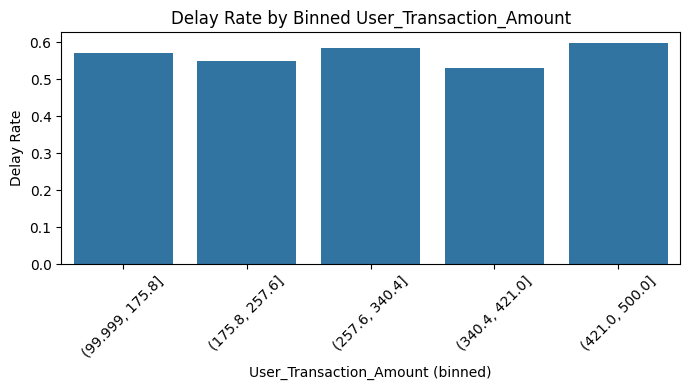

In [ ]:
import numpy as np

def plot_binned_delay_rate(df, feature, bins=5):
    df_copy = df.copy()
    df_copy['bin'] = pd.qcut(df_copy[feature], q=bins, duplicates='drop')
    bin_rate = df_copy.groupby('bin')['Logistics_Delay'].mean().reset_index()

    plt.figure(figsize=(7, 4))
    sns.barplot(x='bin', y='Logistics_Delay', data=bin_rate)
    plt.xticks(rotation=45)
    plt.title(f'Delay Rate by Binned {feature}')
    plt.ylabel('Delay Rate')
    plt.xlabel(f'{feature} (binned)')
    plt.tight_layout()
    plt.show()

# Try this on 2–3 features:
plot_binned_delay_rate(df, 'Waiting_Time')
plot_binned_delay_rate(df, 'Temperature')
plot_binned_delay_rate(df, 'User_Transaction_Amount')


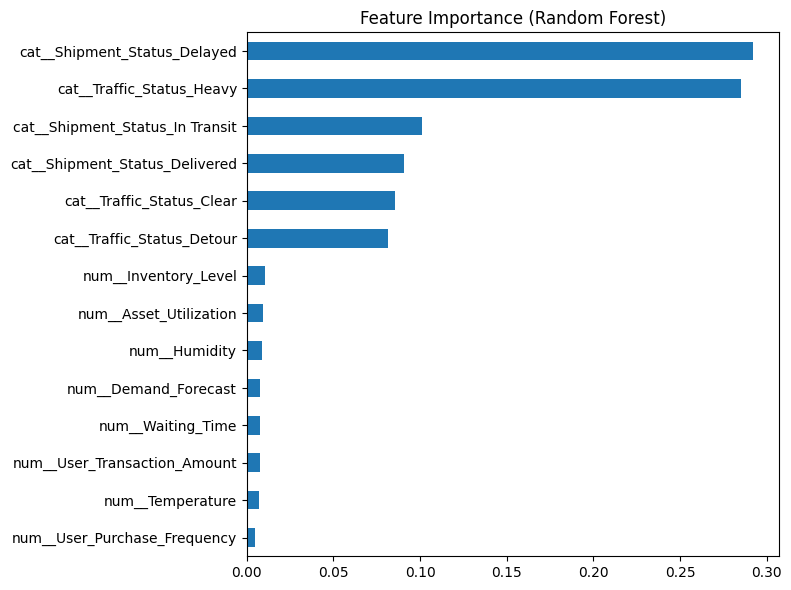

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Quick model setup (for inspection only)
num = ['Inventory_Level', 'Waiting_Time', 'Temperature', 'Humidity',
       'User_Transaction_Amount', 'User_Purchase_Frequency',
       'Asset_Utilization', 'Demand_Forecast']
cat = ['Shipment_Status', 'Traffic_Status']

preprocessor = ColumnTransformer([
    ('num', 'passthrough', num),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat)
])

X = df[num + cat]
y = df['Logistics_Delay']

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

pipe.fit(X, y)

# Get feature importance
importances = pipe.named_steps['model'].feature_importances_
feature_names = pipe.named_steps['prep'].get_feature_names_out()
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot top 15
feat_imp.head(15).plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
df = df.drop(columns=['Shipment_Status'])
